## 

# Análisis

##### Comenzamos con un resumen de lo que vamos a ver en el servidor.

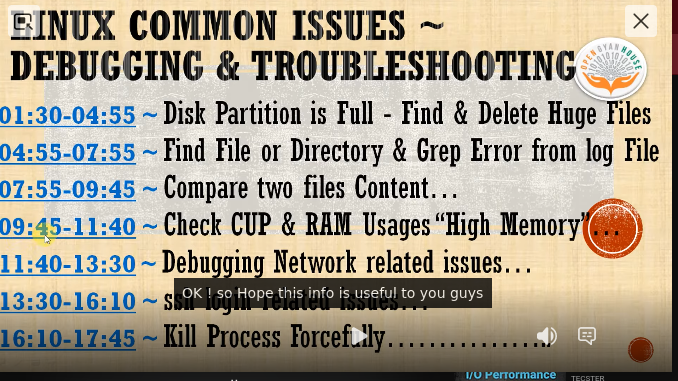

##### En este ejemplo, el comando que se ejecutará es df -h. La opción shell=True le dice a subprocess que debe ejecutar el comando en una terminal de Bash. La opción check=True hace que el script se detenga si el comando devuelve un código de salida diferente de cero. La opción stdout=subprocess.PIPE hace que el resultado del comando se almacene en la variable proceso.stdout, que luego se convierte a una cadena de texto y se imprime en la consola.

In [1]:
import subprocess

# Definir el comando que deseas ejecutar
comando = "df -h"

# Ejecutar el comando en una terminal de Bash
proceso = subprocess.run(comando, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Imprimir la salida del comando
print(proceso.stdout.decode())


S.ficheros     Tamaño Usados  Disp Uso% Montado en
tmpfs            1,6G   3,7M  1,6G   1% /run
/dev/nvme0n1p6    46G    36G  8,0G  82% /
tmpfs            7,8G    39M  7,7G   1% /dev/shm
tmpfs            5,0M   4,0K  5,0M   1% /run/lock
/dev/nvme0n1p1    96M    38M   59M  40% /boot/efi
tmpfs            1,6G   2,4M  1,6G   1% /run/user/1000
/dev/sr0         7,0M   7,0M     0 100% /media/michel/WD Unlocker
/dev/sda1        932G   359G  573G  39% /media/michel/PapaCifrado



##### Podemos observar que le directorio raiz / está al 82%. Nos dirigimos a él y le pasamos el comando `du -sh *` por consola.

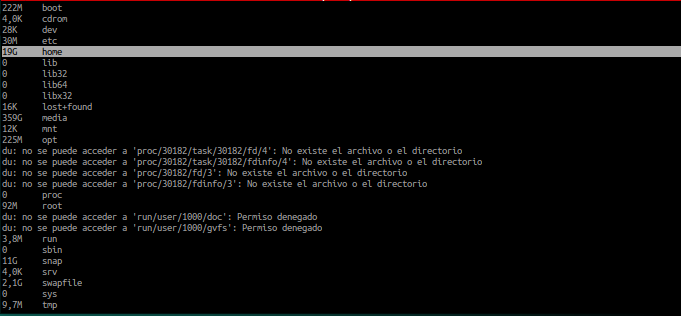

##### Dentro del directorio /home le pasamos el comando `ls -lrt` para ver el contenido. Volvemos a pasarle el comando `du -sh *` y observamos que son dos directorios los que ocupan más. El directorio /ISOS y el directorio /Descargas.

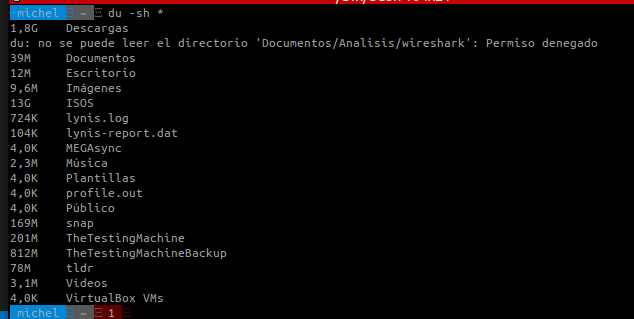

##### Tras el análisis de esta parte ya tenemos la info suficiente como para saber que directorios y archivos son los candidatos a eliminar, bien por duplicados o por obsoletos. La carpeta /var/log/ es recomendable vigilarla y borrar o guardar en otro lugar los archivos viejos. Ya que estamos en esta carpeta estaría bien pasarle el siguiente comando a cada uno de los files de logs. `grep error <nombre del file>`

## Comparando files

##### Relacion de comandos para comparar files:

`diff file file2` \n

`vimdiff file file2` \n

`sdiff file file2` \n



# Recursos del Sistema

##### Vamos a darle un repaso a las herramientas para el análisis de los recursos del sistema. Tenemos varias, una de ellas es `top` para la que ya tenemos sustitutos como `zfxtop` o `btop`. La herramienta `btop` nos muestra algo tal que así.

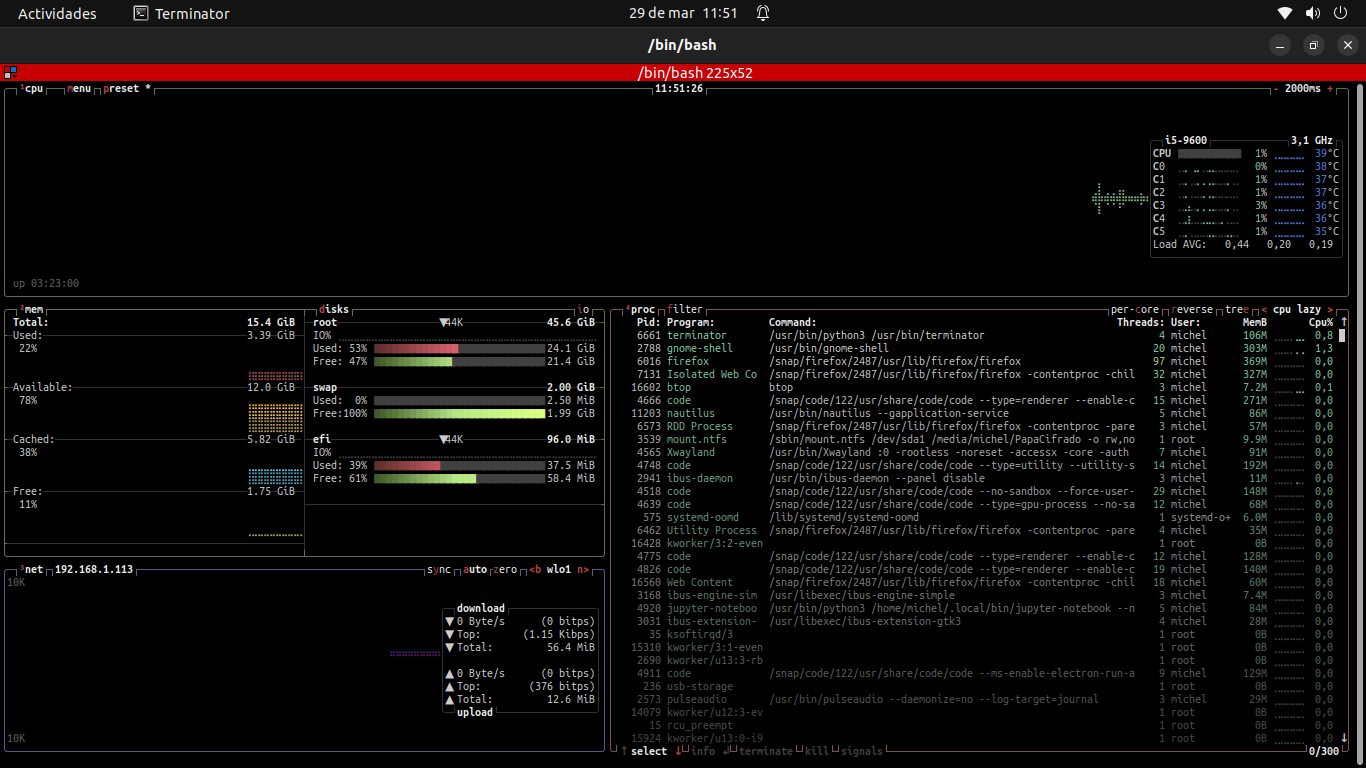

##### Otra herramienta es `free` que nos muestra el estado de la memoria. También tenemos el comando `sar` - Collect, report, or save system activity information. Esta es una herramienta muy util para mostrarte informacion sobre los datos I/O.

##### No se te olvide echar un ojo al directorio /proc/ y a files como cpuinfo que nos dan una información muy valiosa sobre el sistema que os muestro a continuación.

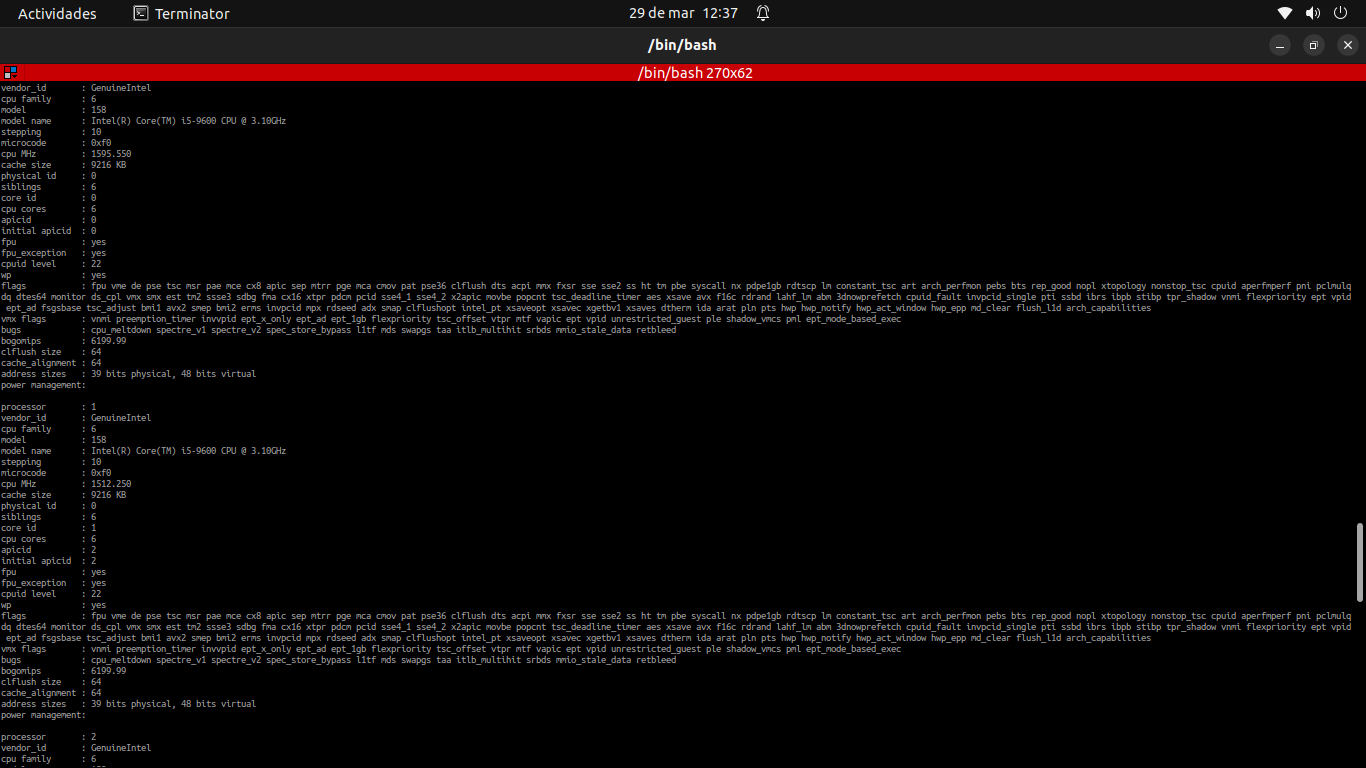

# Análisis Network

##### Para ver las configuraciones de las conexiones que tenemos usamos el conocido comando `ifconfig` ahora sustituido `ip`. Recuerda repasar el manual del comando. El comando `dmesg` nos brinda más info útil.

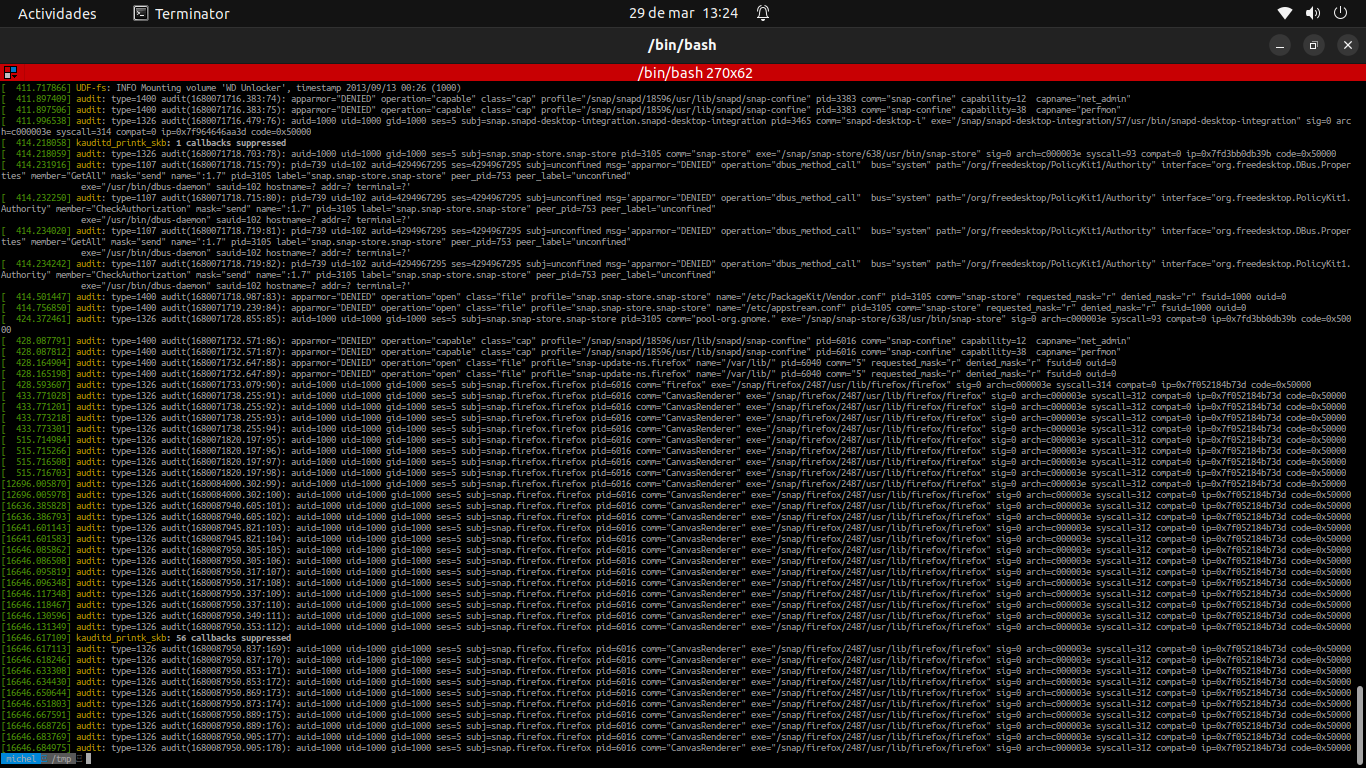

##### El comando usado sin parametros nos devuelve un despliege de todos los mensajes del Kernel. Podemos usar diversos tipos de niveles, por ejemplo, podemos ejecutar lo siguiente: `dmesg --level=alert,info`. De esta manera podemos filtrar la info que recibimos. Otro comando es `dmesg --level=err,warn`. Tenemos diferentes flags para utilizar pero una muy útil es `-T` para el tiempo.


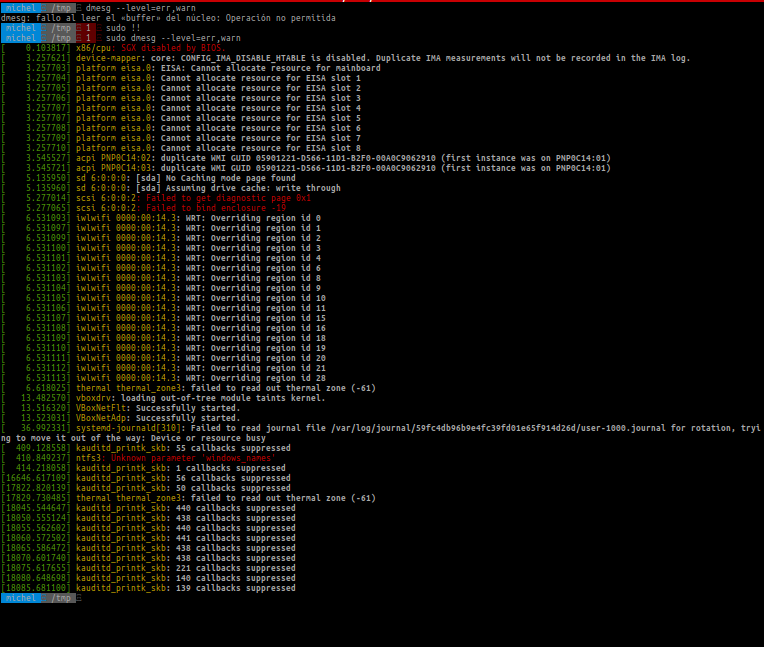

###### Con el parametro `-T`

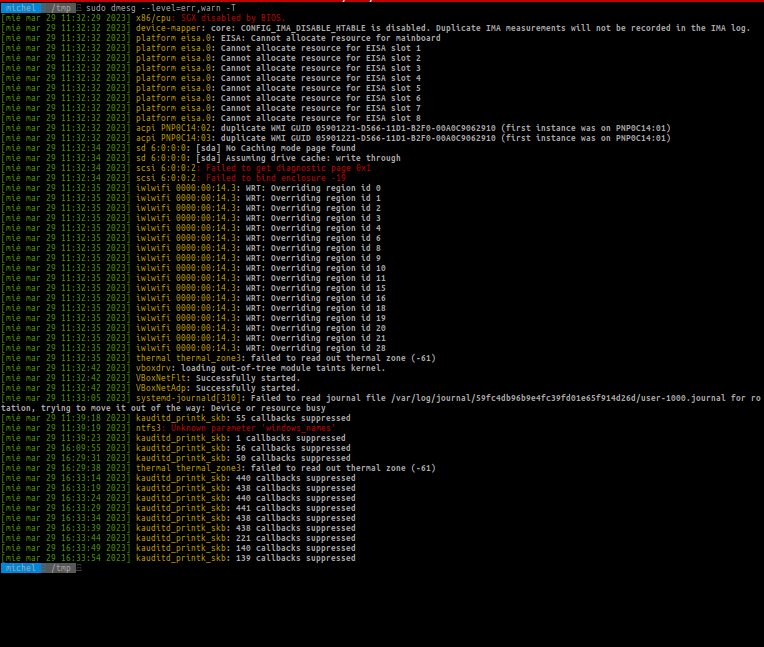

##### Os paso otro comando que me parece una herramienta muy completa y es `glances`. Si tu distribucion es Ubuntu o derivados de Debian lo instalarás con `sudo apt install glances`. Seguimos con otra sugerencia que vale la pena probar y estudiar un poco, esta es `dmidecode`.

##### Otro comando que es muy útil es `tcpdump` que muestra todas las comunicaciones que están entrando y saliendo por las interfaces y los puertos. 

# Enfrentando un problema en el inicio de sesión SSH en Linux

##### SELinux es un mecanismo de control de acceso obligatorio (MAC) implementado en el kernel de Linux que proporciona políticas de seguridad a nivel del sistema para limitar el acceso no autorizado a recursos del sistema como archivos, directorios, puertos de red, etc. Usamos el comando `sestatus` que nos devueve el estado de SELinux en nuestro sistema. Otro comando importante sería `iptables` al que pasamos la flag `-L`. Nos devolvería algo así.

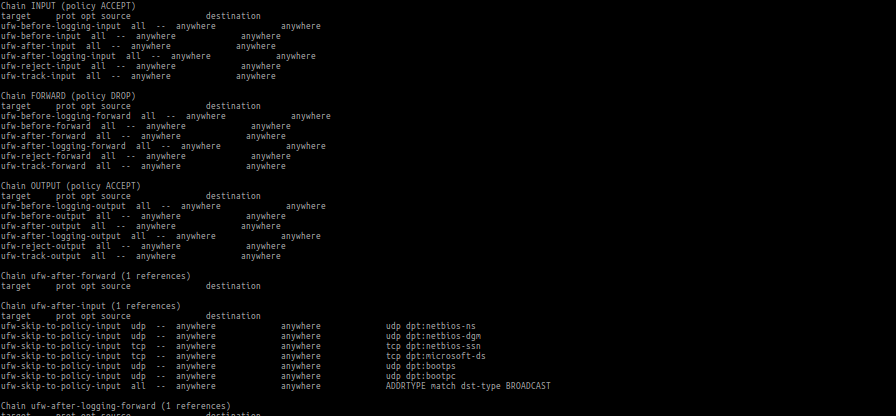

##### Tenemos el directorio /var/log/ con el file audit.log o auth.log en el que tenemos info de los intentos de inicio de sesión en el sistema. Podemos usar el comando `tail -f audit.log` y nos va mostrando cada intento de inicio de sesion que ocurra ya que se van escribiendo en este archivo y con tail nos muestra los ultimos del archivo.

##### El comando `ssh -vvv 192.168.x.x` nos devuelve lo siguiente:

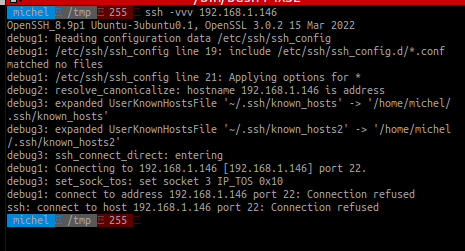

# Matar procesos

##### El comando `ps -ef` muestra una lista completa de todos los procesos en ejecución en el sistema, proporcionando una visión general de la actividad del sistema en tiempo real, lo que puede ser útil para diagnosticar problemas de rendimiento o para monitorear el uso de recursos.

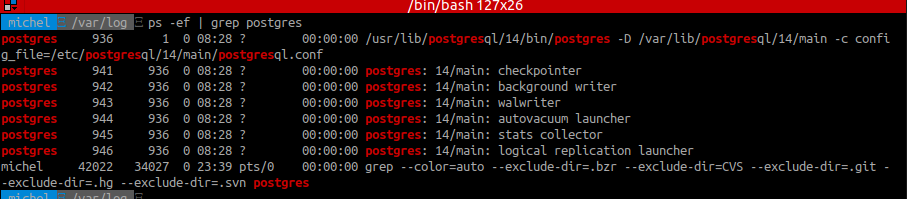

##### Para matar procesos o terminar procesos usamos la herramienta `kill` a la que le pasamos unos parámetros. `kill -9 941 942 943 944`